### Neshyba 2022

## Synchronicity

### Governing equations for a coupled pendulum

We'll be solving for the positions of two pendula (in radians or degrees), $\theta_1(t)$ and $\theta_2(t)$. We'll solve for these in units *radians*, but for display purposes we'll convert to degrees.

The equations that govern how the *acceleration* of each pendulum is affected by the positions of the two pendula are

$$
\theta_1' = f_1(\theta_1,\theta_2) \ \ \ (1)  
$$

and 

$$
\theta_2' = f_2(\theta_1,\theta_2) \ \ \ (2)
$$

where 

$$
f_1(\theta_1,\theta_2) = -{g \over L_1} \times sin(\theta_1) - C \times (sin(\theta_1)-sin(\theta_2)) \ \ \ (3)
$$

and 

$$
f_2(\theta_1,\theta_2) = -{g \over L_2} \times sin(\theta_2) + C \times (sin(\theta_1)-sin(\theta_2)) \ \ \ (4)
$$

Some notes about this:

- The *amplitudes* of rocking back and forth are given by $\theta_1(t)$ and $\theta_2(t)$.
- The *lengths* of the pendula are $L_1$ and $L_2$, which determine how fast each one rocks back and forth (bigger $L$ means slower movement).
- $C$ is a *coupling strength*: when $C=0$, we have just two independent (uncoupled) pendula, but if $C>0$, the pendula will begin to affect one another. 

What kind of effect are we talking about? There are two main things to focus on. First, there's the effect the pendula have on each other's *amplitude* (i.e., $\theta_1$ and $\theta_2$). And second, there's the effect the pendula have on each other's *phase*, i.e., the timing of rocking back and forth. If they're not synchronized, you'll see them doing their own things, but if they're synchronized, you'll see them rocking back and forth together.

Here are some references for this:

Equations of motion for coupled oscilators:
https://phys.libretexts.org/Bookshelves/University_Physics/Book%3A_Mechanics_and_Relativity_(Idema)/08%3A_Oscillations/8.04%3A_Coupled_Oscillators


How to solve a second-order differential equation:
https://la.mathworks.com/help/symbolic/solve-differential-equation-numerically-1.html



In [29]:
import numpy as np
import matplotlib.pyplot as plt

In [30]:
%matplotlib notebook

In [31]:
# These are parameters of the system

# Gravity
g = .01

# Pendulum lengths
L1 = 1
L2 = 1.2

# It's the ratio that matters
goverL1 = g/L1
goverL2 = g/L2

# Coupling between pendula:
# Start w/0, run all and have a look at the results
# Then return here and increase C and see what the effects are
C = 0.01

In [32]:
# Parameters for the run
ntimes = 10000
tmax = 2000
times = np.linspace(0,tmax,ntimes)
dt = times[1]-times[0]

# Starting angles (0 => pointing straight down)
t1 = 0
t2 = 0

# Starting movements
t1p = .1
t2p = .01

In [33]:
# This runs the model, according to Euler

# Start with empty arrays for the angles
t1_array = np.empty(0)
t2_array = np.empty(0)

# March over time, accumulating angles as we go
for i in range(len(times)):
    f1 = -goverL1*np.sin(t1) - C*(np.sin(t1)-np.sin(t2))
    f2 = -goverL2*np.sin(t2) + C*(np.sin(t1)-np.sin(t2))
    
    t1p += f1*dt
    t2p += f2*dt

    t1 += t1p*dt
    t2 += t2p*dt

    t1_array = np.append(t1_array,t1)
    t2_array = np.append(t2_array,t2)

# This converts to degrees
t1_array = t1_array/(2*np.pi)*360
t2_array = t2_array/(2*np.pi)*360

<IPython.core.display.Javascript object>


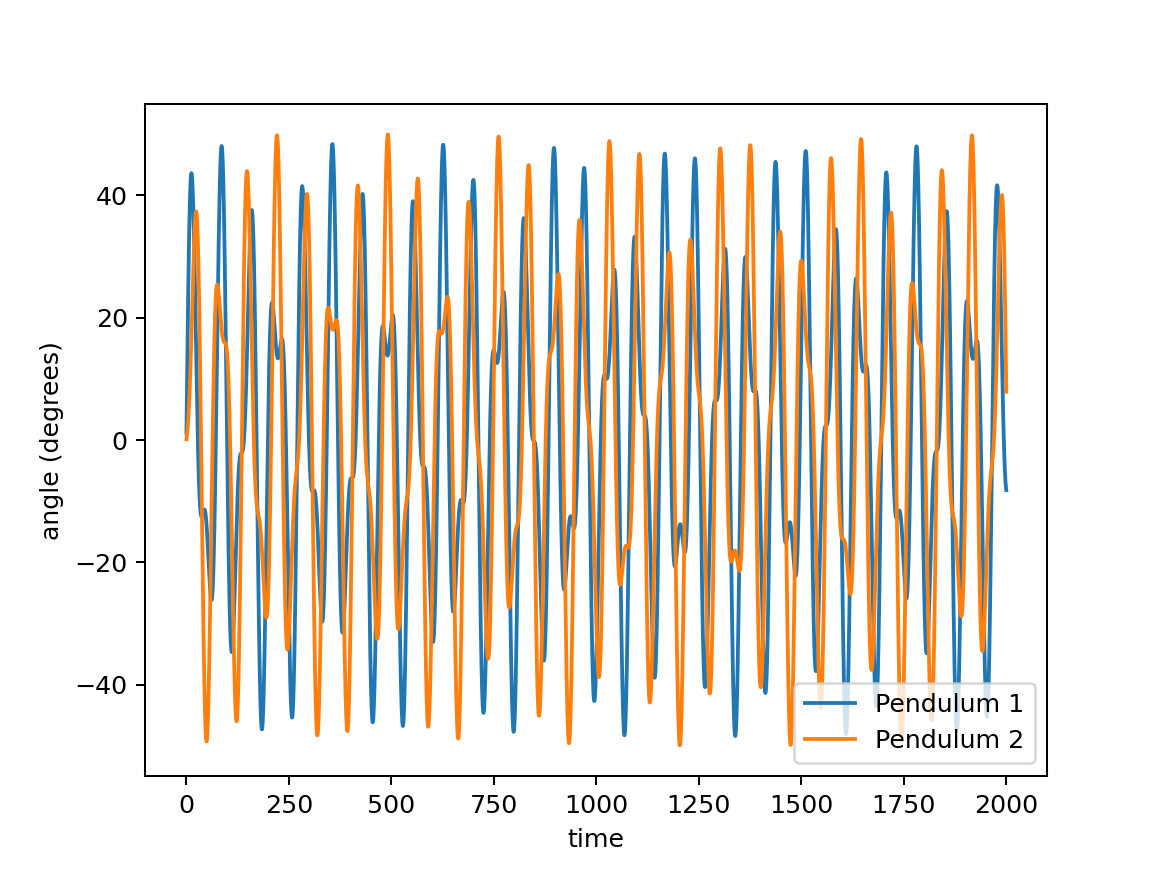

Text(0, 0.5, 'angle (degrees)')

In [34]:
# This plots the model over time
plt.figure()
plt.plot(times,t1_array,label='Pendulum 1')
plt.plot(times,t2_array,label='Pendulum 2')
plt.legend()
plt.xlabel('time')
plt.ylabel('angle (degrees)')

<IPython.core.display.Javascript object>


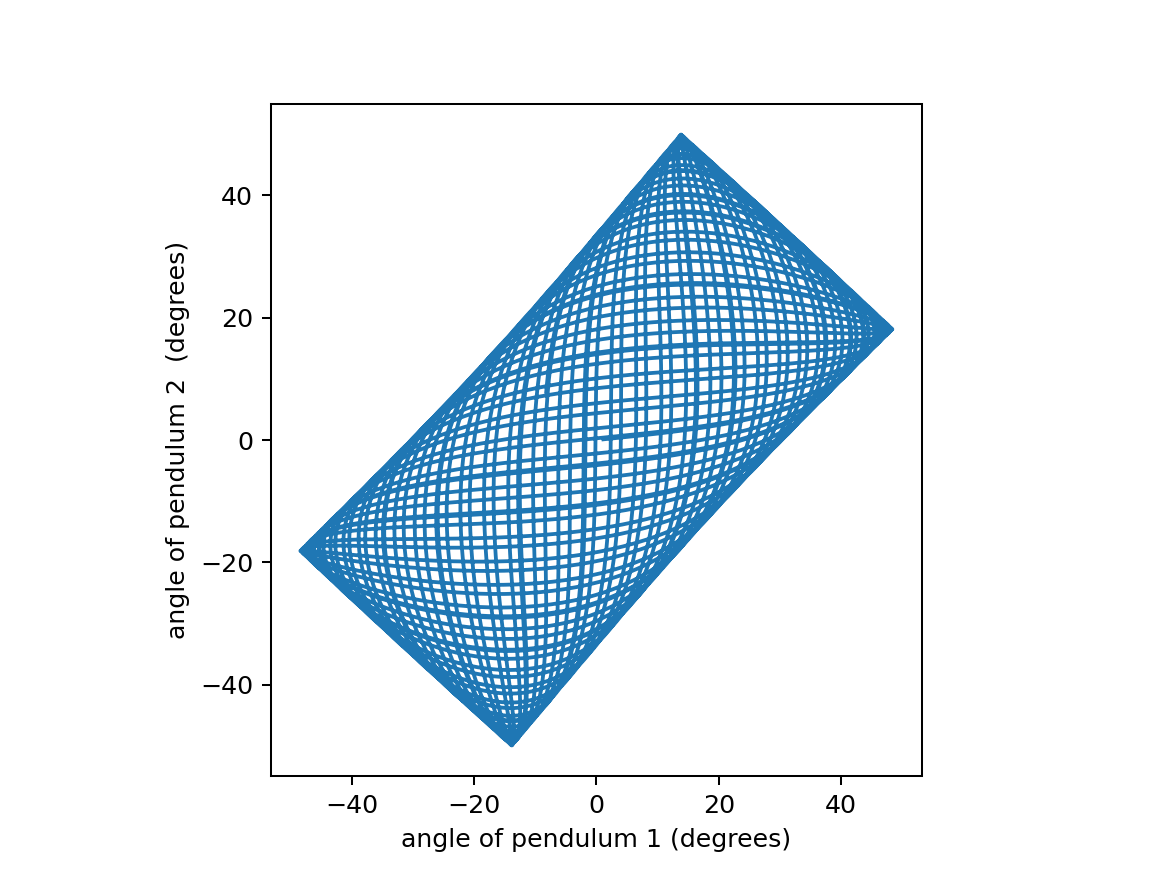

Text(0, 0.5, 'angle of pendulum 2  (degrees)')

In [35]:
# This plots the model parametrically (t1 vs t2)
plt.figure()
plt.axes().set_aspect('equal')
plt.plot(t1_array,t2_array)
plt.xlabel('angle of pendulum 1 (degrees)')
plt.ylabel('angle of pendulum 2  (degrees)')

### Pause for analysis
1. What's the first thing that seems to happen (with really small coupling, like 0.0001)?
1. How big does the coupling have to get before the *amplitudes* of the two pendula start trading off?
1. How big does the coupling have to get before *synchronicity* kicks in?
1. Did anything surprise you about this simulation?